# Problem definition

Predicting whether a customer will churn
(leave the service) or not, using the provided dataset.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# Loading the data

In [2]:
df = pd.read_csv("Curstomer Chrun.csv")

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
df.shape

(360, 21)

### Interpretation :-
The dataset contains 360 records/rows and 21 features/columns.

In [5]:
# Get the names of all the columns present in the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Features

1. customerID: A unique identifier for each customer.
2. gender: The gender of the customer (binary: 'Male'/'Female').
3. SeniorCitizen: A binary variable indicating if the customer is a senior citizen (1 for Yes, 0 for No).
4. Partner: A binary variable indicating if the customer has a partner (Yes/No).
5. Dependents: A binary variable indicating if the customer has dependents (Yes/No).
6. tenure: The number of months the customer has stayed with the service.
7. PhoneService: Whether the customer has a phone service (Yes/No).
8. MultipleLines: Whether the customer has multiple phone lines (Yes/No or 'No phone service').
9. InternetService: The type of internet service the customer has (e.g., 'DSL', 'Fiber optic', 'No').
10. OnlineSecurity: Whether the customer has online security (Yes/No or 'No internet service').
11. OnlineBackup: Whether the customer has an online backup service (Yes/No or 'No internet service').
12. DeviceProtection: Whether the customer has device protection (Yes/No or 'No internet service').
13. TechSupport: Whether the customer has tech support service (Yes/No or 'No internet service').
14. StreamingTV: Whether the customer has streaming TV service (Yes/No or 'No internet service').
15. StreamingMovies: Whether the customer has streaming movie service (Yes/No or 'No internet service').
16. Contract: The contract term of the customer (e.g., 'Month-to-month', 'One year', 'Two year').
17. PaperlessBilling: Whether the customer has opted for paperless billing (Yes/No).
18. PaymentMethod: The customer's payment method (e.g., 'Electronic check', 'Mailed check', 'Bank transfer', 'Credit card').
19. MonthlyCharges: The monthly charges for the customer.
20. TotalCharges: The total amount charged to the customer over time.
21. Churn: Whether the customer has churned (i.e., left the service) (Yes/No).

# Exploratory Data Analysis (EDA)

In [6]:
# Get information about all the features of the dataset such as their non - null value count and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        360 non-null    object 
 1   gender            360 non-null    object 
 2   SeniorCitizen     360 non-null    int64  
 3   Partner           360 non-null    object 
 4   Dependents        360 non-null    object 
 5   tenure            360 non-null    int64  
 6   PhoneService      360 non-null    object 
 7   MultipleLines     360 non-null    object 
 8   InternetService   360 non-null    object 
 9   OnlineSecurity    360 non-null    object 
 10  OnlineBackup      360 non-null    object 
 11  DeviceProtection  360 non-null    object 
 12  TechSupport       360 non-null    object 
 13  StreamingTV       360 non-null    object 
 14  StreamingMovies   360 non-null    object 
 15  Contract          360 non-null    object 
 16  PaperlessBilling  360 non-null    object 
 1

In [7]:
# Descriptive statistics of the dataset
df.describe(include=['O'])

customerID  gender Partner Dependents PhoneService MultipleLines  \
count          360     360     360        360          360           360   
unique         360       2       2          2            2             3   
top     7590-VHVEG  Female      No         No          Yes            No   
freq             1     189     190        248          319           180   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count              360            360          360              360   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq               160            180          155              176   

       TechSupport StreamingTV StreamingMovies        Contract  \
count          360         360             360             360   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq           190         149             149             199   

       PaperlessBilling     PaymentMethod Churn  
count               360               360   359  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq                214               126   265

### The key statistics returned by df.describe(include=['O']) are :-
* count: The number of non-null entries for each column of object type.
* unique: The number of unique values present in each object column.
* top: The most frequent value (mode) in each object column.
* freq: The frequency of the top value, i.e., how often the most frequent value occurs

In [8]:
df.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     360.000000  360.000000      360.000000    360.000000
mean        0.169444   31.477778       65.810417   2204.427500
std         0.375666   24.544759       29.231232   2174.740212
min         0.000000    1.000000       18.950000     19.250000
25%         0.000000    8.000000       44.537500    419.487500
50%         0.000000   27.500000       71.025000   1333.975000
75%         0.000000   53.000000       89.850000   3553.350000
max         1.000000   72.000000      115.100000   8129.300000

### The key statistics returned by df.describe() are:
* count: The number of non-null values in each column.
* mean: The average of the values in the column.
* std: The standard deviation, which measures the spread or dispersion of the values.
* min: The minimum value in the column.
* 25% (1st quartile): The 25th percentile, i.e., a value below which 25% of the data falls.
* 50% (median or 2nd quartile): The 50th percentile, i.e., the middle value of the data.
* 75% (3rd quartile): The 75th percentile, i.e., a value below which 75% of the data falls.
* max: The maximum value in the column.

In [9]:
df['Churn'].value_counts()

Churn
No     265
Yes     94
Name: count, dtype: int64

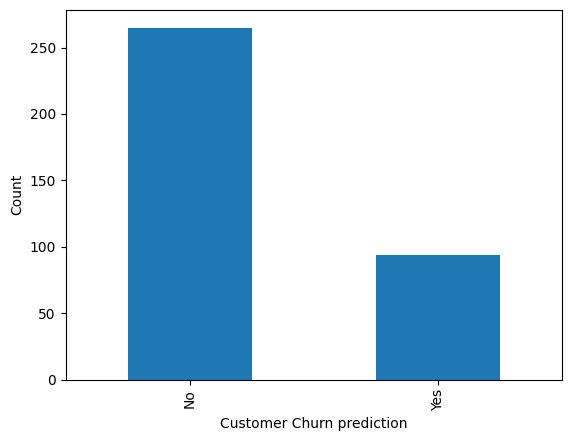

In [10]:
# Visualizing the distribution of target variable (Churn)
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Customer Churn prediction')
plt.ylabel('Count')
plt.show();

In [11]:
(
    df
    .Churn
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.Churn.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
Churn                   
No       265    0.738162
Yes       94    0.261838

In [12]:
df['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df[~((df['Churn'] == 'Yes') | (df['Churn'] == 'No'))]

customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
359  9833-TGFHX   Male              0     Yes        Yes      42          Yes   

    MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
359           Yes     Fiber optic            Yes  ...               No   

    TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
359          No         Yes             Yes  One year               No   

        PaymentMethod MonthlyCharges  TotalCharges  Churn  
359  Electronic check           97.1        4016.0    NaN  

[1 rows x 21 columns]

In [14]:
# Since, only one record has NaN value, we can drop it
df.drop(index=359, inplace=True)

### Conclusion :-
Since, the 'No' value count is much greater (73%) than the 'Yes' value count(26%), therefore, it is a heavily imbalanced dataset.

## Correlation analysis

In [15]:
numeric_features = df.select_dtypes(include="number")

# Calculate Spearman rank correlation matrix
spearman_corr = numeric_features.corr(method='spearman')

print("Spearman Rank Correlation Matrix:")
print(spearman_corr)

Spearman Rank Correlation Matrix:
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000 -0.065136        0.150582      0.014672
tenure              -0.065136  1.000000        0.229157      0.883294
MonthlyCharges       0.150582  0.229157        1.000000      0.611966
TotalCharges         0.014672  0.883294        0.611966      1.000000


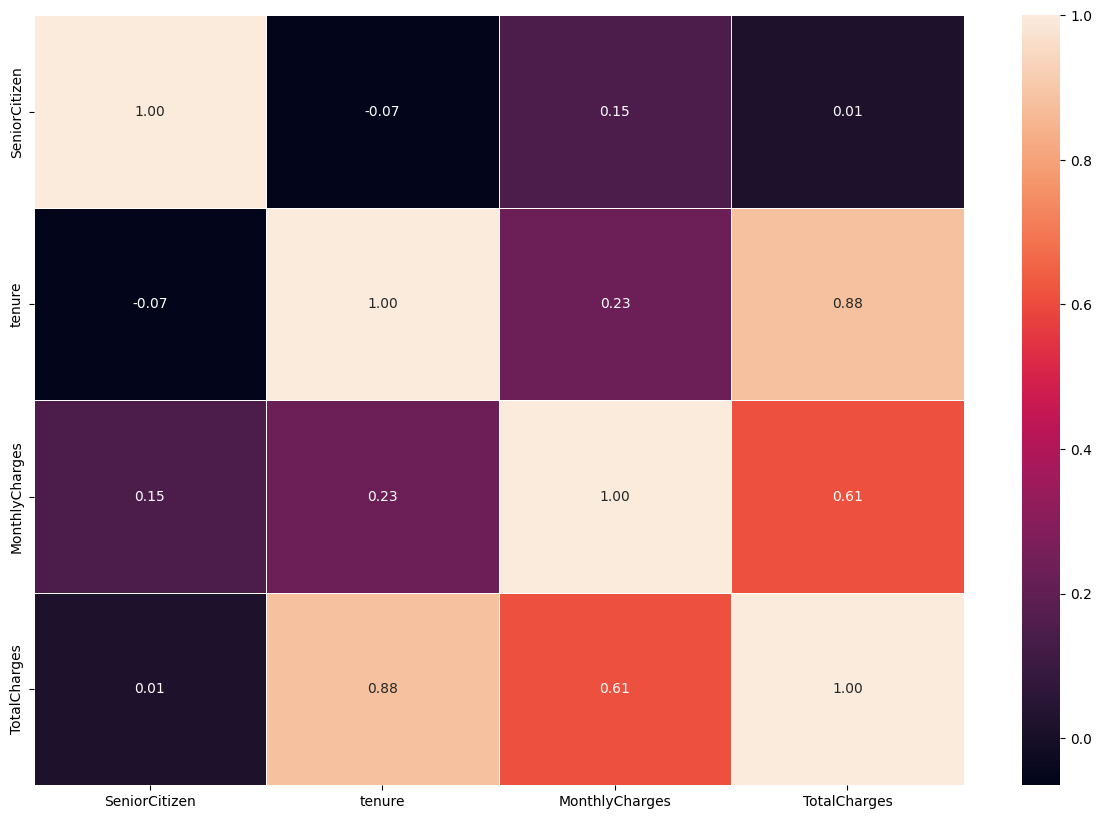

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(spearman_corr,
                annot=True,
                fmt=".2f",
                linewidths=0.5)

### Key Interpretations:
* SeniorCitizen:

**Correlation with tenure: -0.066 →** A weak negative correlation, suggesting that whether a customer is a senior citizen has little effect on the length of their subscription.


**Correlation with MonthlyCharges: 0.148 →** A weak positive correlation, indicating that senior citizens might slightly tend to have higher monthly charges.


**Correlation with TotalCharges: 0.013 →** A very weak positive correlation, indicating almost no relationship between being a senior citizen and total charges.

* tenure:

**Correlation with MonthlyCharges: 0.231 →** A weak positive correlation, indicating that customers with longer subscriptions tend to have slightly higher monthly charges.


**Correlation with TotalCharges: 0.883 →** A strong positive correlation, indicating that customers with longer tenure are likely to have much higher total charges (which makes sense, as they’ve been paying for a longer period).

* MonthlyCharges:

**Correlation with TotalCharges: 0.614 →** A moderately strong positive correlation, indicating that higher monthly charges are associated with higher total charges.

### Checking for missing values

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, 1840.75,  151.65,  820.5 , 1949.4 ,
        301.9 , 3046.05, 3487.95,  587.45,  326.8 , 5681.1 , 5036.3 ,
       2686.05, 7895.15, 1022.95, 7382.25,  528.35, 1862.9 ,   39.65,
        202.25,   20.15, 3505.1 , 2970.3 , 1530.6 , 4749.15,   30.2 ,
       6369.45, 1093.1 , 6766.95,  181.65, 1874.45,   20.2 ,   45.25,
       7251.7 ,  316.9 , 3548.3 , 3549.25, 1105.4 ,  475.7 , 4872.35,
        418.25, 4861.45,  981.45, 3906.7 ,   97.  ,  144.15, 4217.8 ,
       4254.1 , 3838.75, 1426.4 , 1752.65,  633.3 , 4456.35, 1752.55,
       6311.2 , 7076.35,  894.3 , 7853.7 , 4707.1 , 5450.7 , 2962.  ,
        957.1 ,  857.25,  244.1 , 3650.35, 2497.2 ,  930.9 ,  887.35,
         49.05, 1090.65, 7099.  , 1424.6 ,  177.4 , 6139.5 , 2688.85,
        482.25, 2111.3 , 1216.6 ,   79.35,  565.35,  496.9 , 4327.5 ,
        973.35,  918.75, 2215.45, 1057.  ,  927.1 , 1009.25, 2570.2 ,
         74.7 , 5714.25, 7107.  , 7459.05,  927.35, 4748.7 ,  113.85,
       1107.2 , 2514

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [20]:
df['TotalCharges'].dtype

dtype('float64')

### Checking for duplicates

In [21]:
df.duplicated().sum()

0

# Univariate analysis

## 1. Gender

In [64]:
df['gender'].value_counts()

gender
Female    189
Male      170
Name: count, dtype: int64

In [71]:
(
    df
    .gender
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.gender.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
gender                   
Female    189    0.526462
Male      170    0.473538

<Axes: ylabel='count'>

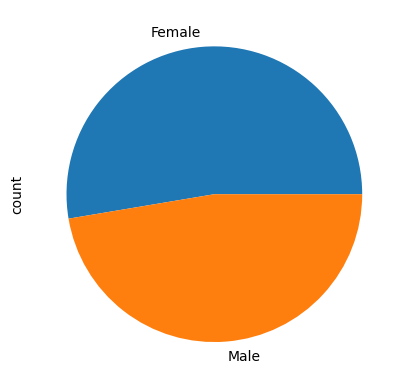

In [70]:
df['gender'].value_counts().plot(kind="pie")

## 2. Senior Citizen

In [73]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    298
1     61
Name: count, dtype: int64

In [75]:
(
    df
    .SeniorCitizen
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.SeniorCitizen.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
SeniorCitizen                   
0                298    0.830084
1                 61    0.169916

<Axes: ylabel='count'>

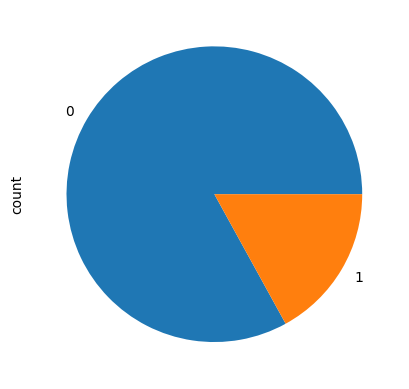

In [76]:
df['SeniorCitizen'].value_counts().plot(kind="pie")

## 3. Partner

In [77]:
df['Partner'].value_counts()

Partner
No     190
Yes    169
Name: count, dtype: int64

In [78]:
(
    df
    .Partner
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.Partner.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
Partner                   
No         190    0.529248
Yes        169    0.470752

<Axes: ylabel='count'>

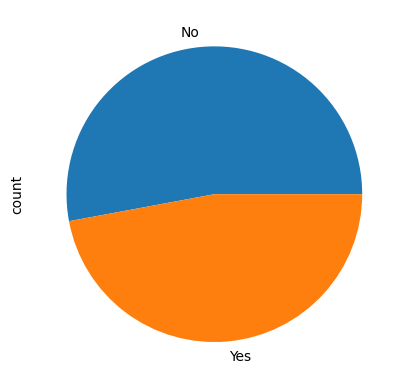

In [79]:
df['Partner'].value_counts().plot(kind="pie")

## 4. Dependents

In [80]:
df['Dependents'].value_counts()

Dependents
No     248
Yes    111
Name: count, dtype: int64

In [81]:
(
    df
    .Dependents
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.Dependents.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
Dependents                   
No            248    0.690808
Yes           111    0.309192

<Axes: ylabel='count'>

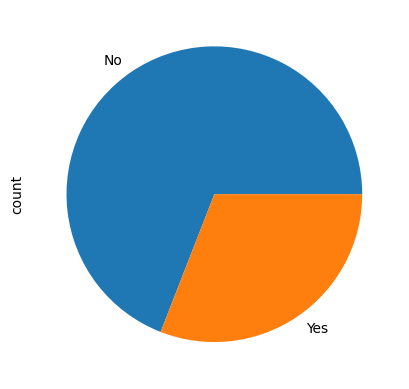

In [82]:
df['Dependents'].value_counts().plot(kind="pie")

## 5. tenure

In [83]:
df['tenure'].value_counts()

tenure
1     35
72    18
2     15
10    11
71    11
      ..
60     2
28     2
51     2
55     1
44     1
Name: count, Length: 70, dtype: int64

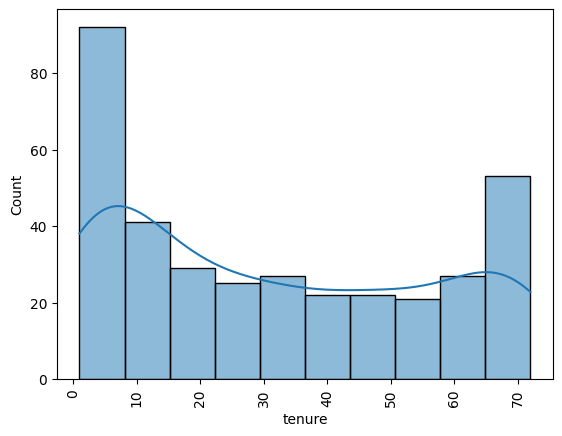

In [84]:
sns.histplot(x=df['tenure'], kde=True)
plt.xticks(rotation=90)
plt.show();

## 6. Phone Service 

In [89]:
df['PhoneService'].value_counts()

PhoneService
Yes    318
No      41
Name: count, dtype: int64

In [90]:
(
    df
    .PhoneService
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.PhoneService.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
PhoneService                   
Yes             318    0.885794
No               41    0.114206

<Axes: ylabel='count'>

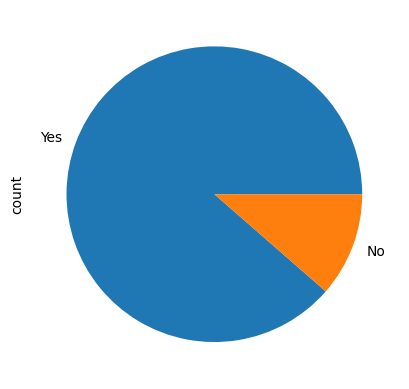

In [91]:
df['PhoneService'].value_counts().plot(kind="pie")

## 7. Multiple Lines

In [92]:
df['MultipleLines'].value_counts()

MultipleLines
No                  180
Yes                 138
No phone service     41
Name: count, dtype: int64

In [97]:
(
    df
    .MultipleLines
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.MultipleLines.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
MultipleLines                      
No                  180    0.501393
Yes                 138    0.384401
No phone service     41    0.114206

<Axes: ylabel='count'>

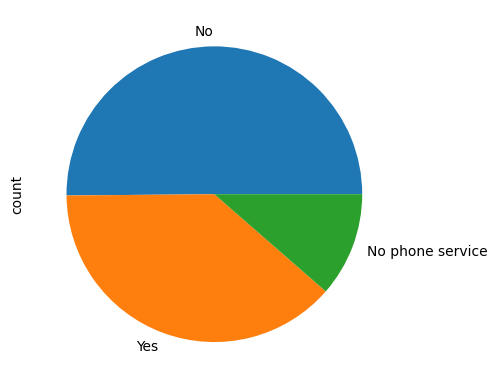

In [98]:
df['MultipleLines'].value_counts().plot(kind="pie")

<Axes: xlabel='MultipleLines'>

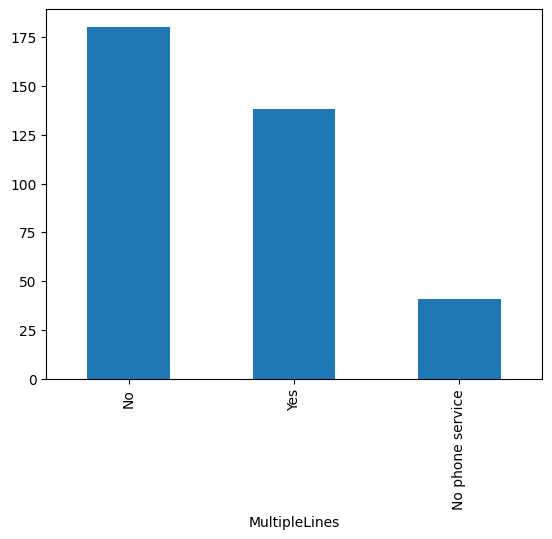

In [99]:
df['MultipleLines'].value_counts().plot(kind="bar")

## 8. Internet Service

In [96]:
df['InternetService'].value_counts()

InternetService
Fiber optic    159
DSL            134
No              66
Name: count, dtype: int64

In [101]:
(
    df
    .InternetService
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.InternetService.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
InternetService                   
Fiber optic        159    0.442897
DSL                134    0.373259
No                  66    0.183844

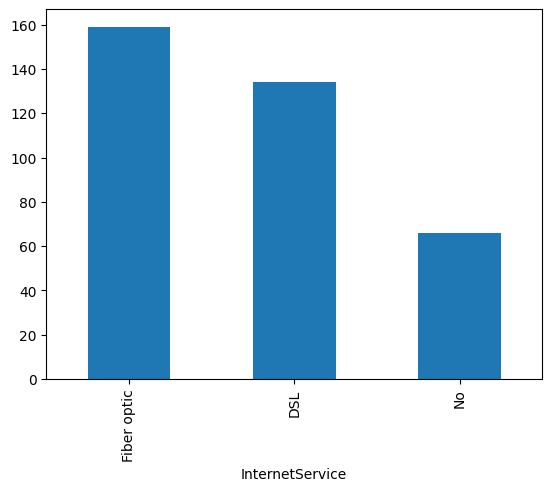

In [102]:
df['InternetService'].value_counts().plot(kind="bar");

## 9. Online Security

In [103]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     180
Yes                    113
No internet service     66
Name: count, dtype: int64

In [104]:
(
    df
    .OnlineSecurity
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.OnlineSecurity.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
OnlineSecurity                        
No                     180    0.501393
Yes                    113    0.314763
No internet service     66    0.183844

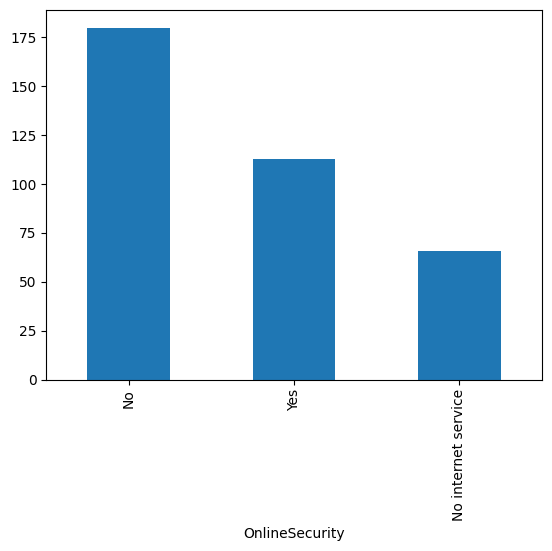

In [105]:
df['OnlineSecurity'].value_counts().plot(kind="bar");

## 10. Online Backup

In [106]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     154
Yes                    139
No internet service     66
Name: count, dtype: int64

In [107]:
(
    df
    .OnlineBackup
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.OnlineBackup.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
OnlineBackup                          
No                     154    0.428969
Yes                    139    0.387187
No internet service     66    0.183844

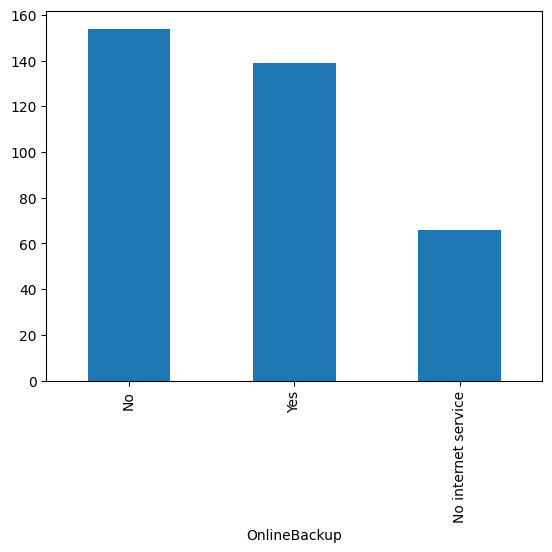

In [108]:
df['OnlineBackup'].value_counts().plot(kind="bar");

## 11. Device Protection

In [109]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     175
Yes                    118
No internet service     66
Name: count, dtype: int64

In [110]:
(
    df
    .DeviceProtection
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.DeviceProtection.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
DeviceProtection                      
No                     175    0.487465
Yes                    118    0.328691
No internet service     66    0.183844

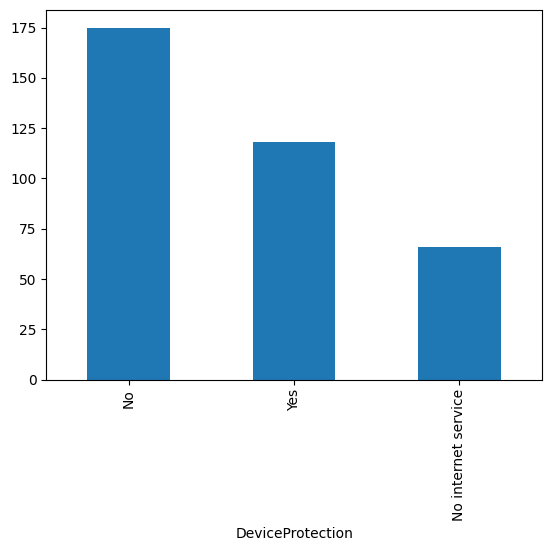

In [111]:
df['DeviceProtection'].value_counts().plot(kind="bar");

## 12. Tech Support

In [33]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [112]:
(
    df
    .TechSupport
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.TechSupport.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
TechSupport                           
No                     189    0.526462
Yes                    104    0.289694
No internet service     66    0.183844

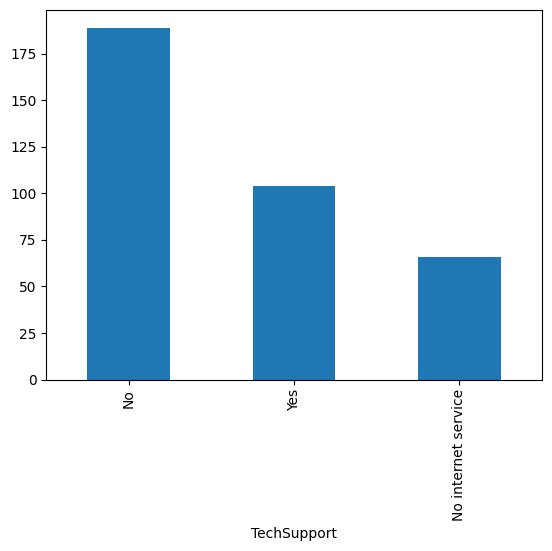

In [113]:
df['TechSupport'].value_counts().plot(kind="bar");

## 13. Streaming TV

In [34]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [114]:
(
    df
    .StreamingTV
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.StreamingTV.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
StreamingTV                           
No                     149    0.415042
Yes                    144    0.401114
No internet service     66    0.183844

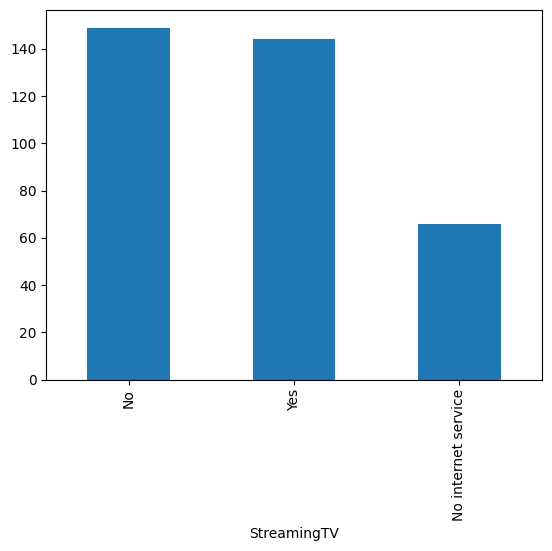

In [115]:
df['StreamingTV'].value_counts().plot(kind="bar");

## 14. Streaming Movies

In [35]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [116]:
(
    df
    .StreamingMovies
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.StreamingMovies.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
StreamingMovies                       
No                     149    0.415042
Yes                    144    0.401114
No internet service     66    0.183844

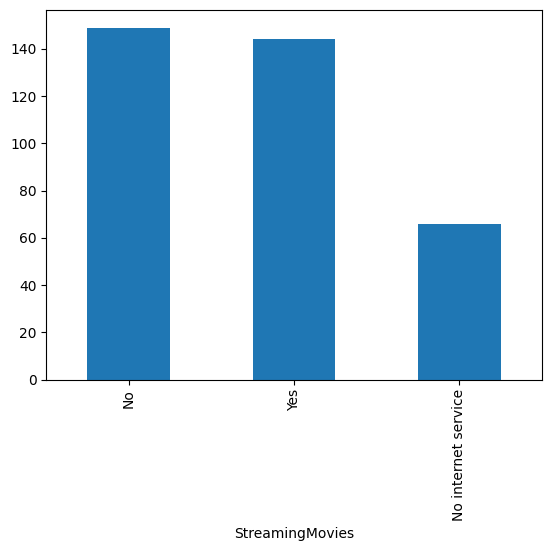

In [117]:
df['StreamingMovies'].value_counts().plot(kind="bar");

# Conclusions:
1. **Moderate Internet Feature Adoption:** Many customers are not subscribed to additional internet features like online security, device protection, and tech support, suggesting these features may not be considered essential or valuable to most users.


2. **Streaming Services:** There’s a fairly balanced split between customers using and not using streaming services (both TV and movies). This implies that while many customers value streaming services, a significant portion still does not, which could reflect either a reliance on external platforms or lower interest in internet provider-bundled streaming services.


3. **No Internet Service Segment:** The group of customers (66) with no internet service represents a noteworthy portion of the customer base. These customers either do not need internet or possibly use an alternate service provider, which could be a key segment for the business to target in terms of conversion.


4. **Opportunity for Growth:** There appears to be potential for the provider to increase adoption rates of services like tech support, online security, and device protection, as more than half the customers are not using these features. Educating customers on the benefits or bundling services could help drive uptake.

## 15. Contract

In [36]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [118]:
(
    df
    .Contract
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.Contract.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
Contract                         
Month-to-month    199    0.554318
Two year           88    0.245125
One year           72    0.200557

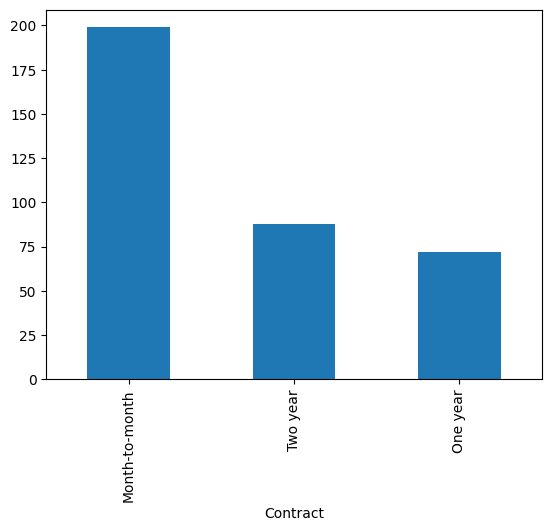

In [119]:
df['Contract'].value_counts().plot(kind="bar");

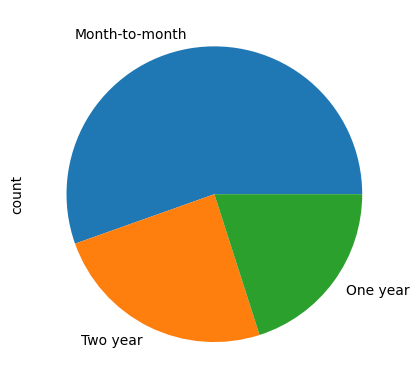

In [120]:
df['Contract'].value_counts().plot(kind="pie");

## 16. Paperless Billing

In [37]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [121]:
(
    df
    .PaperlessBilling
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.PaperlessBilling.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
PaperlessBilling                   
Yes                 214      0.5961
No                  145      0.4039

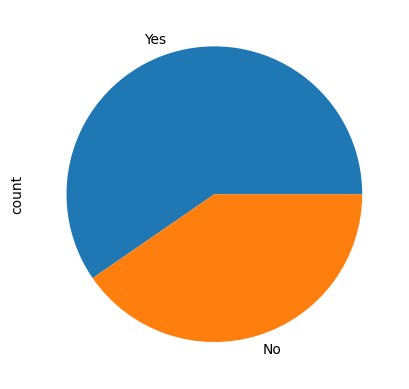

In [122]:
df['PaperlessBilling'].value_counts().plot(kind="pie");

## 17. Payment Method

In [38]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [123]:
(
    df
    .PaymentMethod
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            df.PaymentMethod.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
PaymentMethod                               
Electronic check             125    0.348189
Credit card (automatic)       81    0.225627
Mailed check                  79    0.220056
Bank transfer (automatic)     74    0.206128

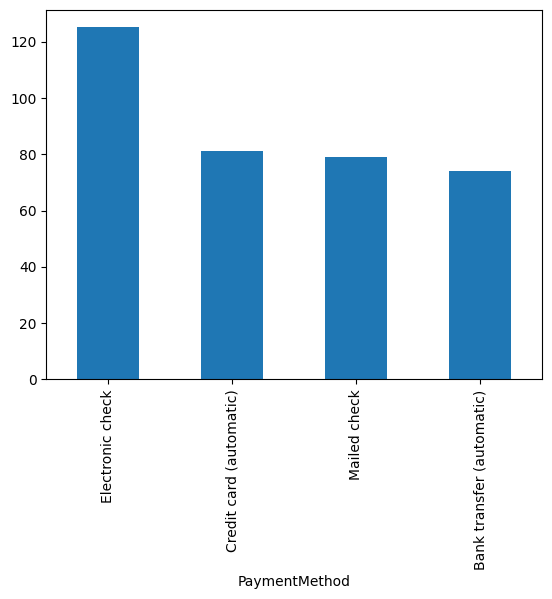

In [124]:
df['PaymentMethod'].value_counts().plot(kind="bar");

## 18. Monthly Charges

In [39]:
df['MonthlyCharges'].unique()

array([ 29.85,  56.95,  53.85,  42.3 ,  70.7 ,  99.65,  89.1 ,  29.75,
       104.8 ,  56.15,  49.95,  18.95, 100.35, 103.7 , 105.5 , 113.25,
        20.65, 106.7 ,  55.2 ,  90.05,  39.65,  19.8 ,  20.15,  59.9 ,
        59.6 ,  55.3 ,  99.35,  30.2 ,  90.25,  64.7 ,  96.35,  95.5 ,
        66.15,  20.2 ,  45.25,  99.9 ,  69.7 ,  74.8 , 106.35,  97.85,
        49.55,  69.2 ,  20.75,  79.85,  76.2 ,  84.5 ,  49.25,  80.65,
        79.75,  64.15,  99.1 ,  69.5 ,  74.85,  95.45, 108.45,  24.95,
       107.5 , 100.5 ,  89.9 ,  42.1 ,  54.4 ,  94.4 ,  75.3 ,  78.9 ,
        79.2 ,  49.05,  20.4 , 111.6 ,  24.25,  64.5 , 110.5 ,  55.65,
        54.65,  74.75,  25.9 ,  79.35,  50.55,  75.15, 103.8 ,  99.3 ,
        62.15,  19.95,  33.75,  82.05,  74.7 ,  84.  , 111.05, 100.9 ,
        78.95,  66.85,  21.05,  21.  ,  98.5 ,  19.45,  95.  ,  45.55,
       110.  ,  24.3 , 104.15,  30.15,  94.35,  19.4 ,  96.75,  57.95,
        91.65,  76.5 ,  54.6 ,  89.85,  31.05, 100.25,  85.2 ,  99.8 ,
      

In [40]:
df['MonthlyCharges'].dtype

dtype('float64')

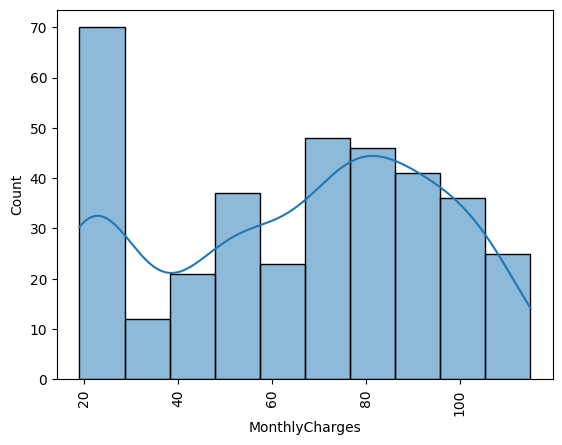

In [125]:
sns.histplot(x=df['MonthlyCharges'], kde=True)
plt.xticks(rotation=90)
plt.show();

In [127]:
from scipy import stats

print(f"Mean : {df['MonthlyCharges'].mean()}")
print(f"Trimmed Mean (5%): {stats.trim_mean(df['MonthlyCharges'], 0.05)}")
print(f"Mean : {stats.trim_mean(df['MonthlyCharges'], 0.1)}")
print(f"Median : {df['MonthlyCharges'].median()}")

Mean : 65.72325905292479
Trimmed Mean (5%): 65.76030769230769
Mean : 66.13477508650519
Median : 70.9


In [128]:
print(f"Variance : {df['MonthlyCharges'].var()}")
print(f"Standard deviation : {df['MonthlyCharges'].std()}")
iqr = df['MonthlyCharges'].quantile(0.75) - df['MonthlyCharges'].quantile(0.25) 
print(f"IQR : {iqr}")
print(f"MAD : {stats.median_abs_deviation(df['MonthlyCharges'].dropna())}")

Variance : 854.109338790246
Standard deviation : 29.22514908071892
IQR : 45.12499999999999
MAD : 22.599999999999994


In [129]:
print(f"Skewness : {df['MonthlyCharges'].skew()}")
print(f"Kurtosis : {df['MonthlyCharges'].kurtosis()}")

Skewness : -0.24975561858865739
Kurtosis : -1.169144398340082


### Key interpretations :-
* **Skewness** of -0.2497 suggests the data is slightly negatively skewed, but close to symmetric.
* **Kurtosis** of -1.1691 indicates that the data is flatter and has fewer extreme values compared to a normal distribution.

## 19. Total Charges

In [41]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, 1840.75,  151.65,  820.5 , 1949.4 ,
        301.9 , 3046.05, 3487.95,  587.45,  326.8 , 5681.1 , 5036.3 ,
       2686.05, 7895.15, 1022.95, 7382.25,  528.35, 1862.9 ,   39.65,
        202.25,   20.15, 3505.1 , 2970.3 , 1530.6 , 4749.15,   30.2 ,
       6369.45, 1093.1 , 6766.95,  181.65, 1874.45,   20.2 ,   45.25,
       7251.7 ,  316.9 , 3548.3 , 3549.25, 1105.4 ,  475.7 , 4872.35,
        418.25, 4861.45,  981.45, 3906.7 ,   97.  ,  144.15, 4217.8 ,
       4254.1 , 3838.75, 1426.4 , 1752.65,  633.3 , 4456.35, 1752.55,
       6311.2 , 7076.35,  894.3 , 7853.7 , 4707.1 , 5450.7 , 2962.  ,
        957.1 ,  857.25,  244.1 , 3650.35, 2497.2 ,  930.9 ,  887.35,
         49.05, 1090.65, 7099.  , 1424.6 ,  177.4 , 6139.5 , 2688.85,
        482.25, 2111.3 , 1216.6 ,   79.35,  565.35,  496.9 , 4327.5 ,
        973.35,  918.75, 2215.45, 1057.  ,  927.1 , 1009.25, 2570.2 ,
         74.7 , 5714.25, 7107.  , 7459.05,  927.35, 4748.7 ,  113.85,
       1107.2 , 2514

In [42]:
df['TotalCharges'].dtype

dtype('float64')

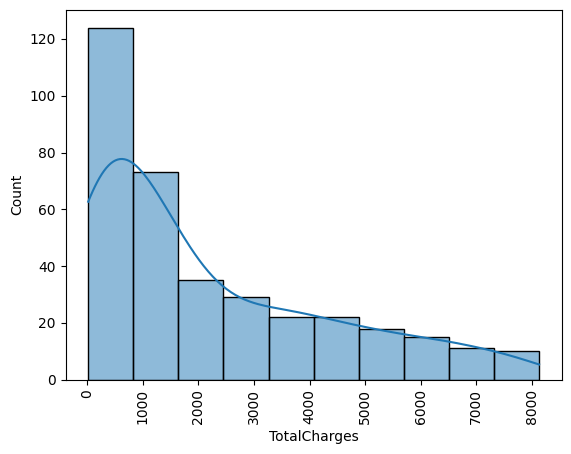

In [126]:
sns.histplot(x=df['TotalCharges'], kde=True)
plt.xticks(rotation=90)
plt.show();

In [130]:
from scipy import stats

print(f"Mean : {df['TotalCharges'].mean()}")
print(f"Trimmed Mean (5%): {stats.trim_mean(df['TotalCharges'], 0.05)}")
print(f"Mean : {stats.trim_mean(df['TotalCharges'], 0.1)}")
print(f"Median : {df['TotalCharges'].median()}")

Mean : 2199.381337047354
Trimmed Mean (5%): 2036.6647692307695
Mean : 1894.822837370242
Median : 1328.15


In [131]:
print(f"Variance : {df['TotalCharges'].var()}")
print(f"Standard deviation : {df['TotalCharges'].std()}")
iqr = df['TotalCharges'].quantile(0.75) - df['TotalCharges'].quantile(0.25) 
print(f"IQR : {iqr}")
print(f"MAD : {stats.median_abs_deviation(df['TotalCharges'].dropna())}")

Variance : 4733513.307904911
Standard deviation : 2175.663877510704
IQR : 3129.7000000000003
MAD : 1172.3500000000001


In [132]:
print(f"Skewness : {df['TotalCharges'].skew()}")
print(f"Kurtosis : {df['TotalCharges'].kurtosis()}")

Skewness : 1.0140582238427478
Kurtosis : -0.05197952403630923


### Key interpretations :-
* **Skewness** of 1.0141 indicates a moderate positive skew, meaning the distribution is right-skewed with a few higher values pulling the tail to the right.
* **Kurtosis** of -0.0520 suggests the distribution is close to normal in terms of peak and tail behavior, but slightly flatter.

## Plotting boxplots to identify outliers

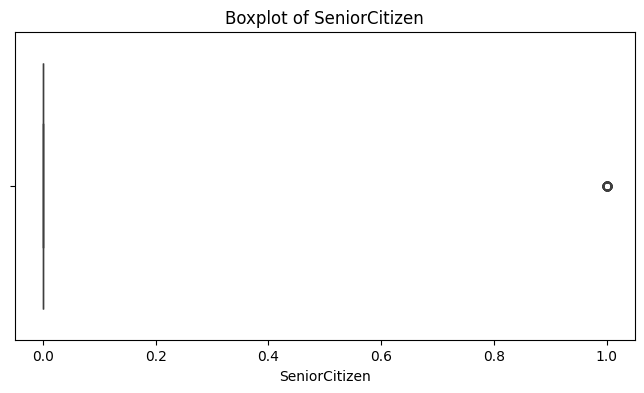

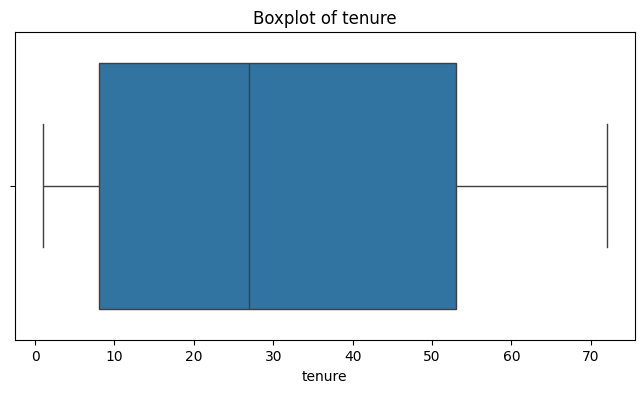

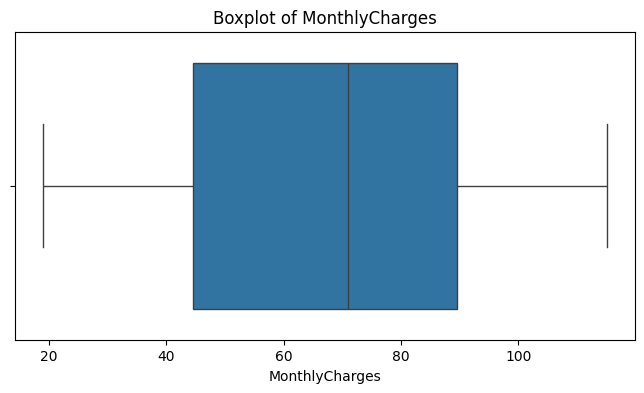

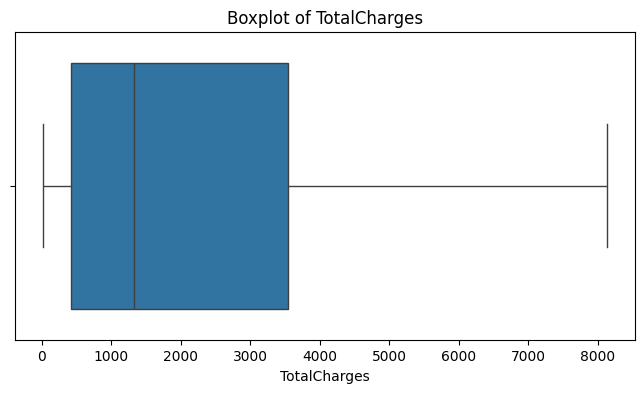

In [47]:
for var in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

## Conclusion :-
There are no outliers that need to be handled in the given dataset.

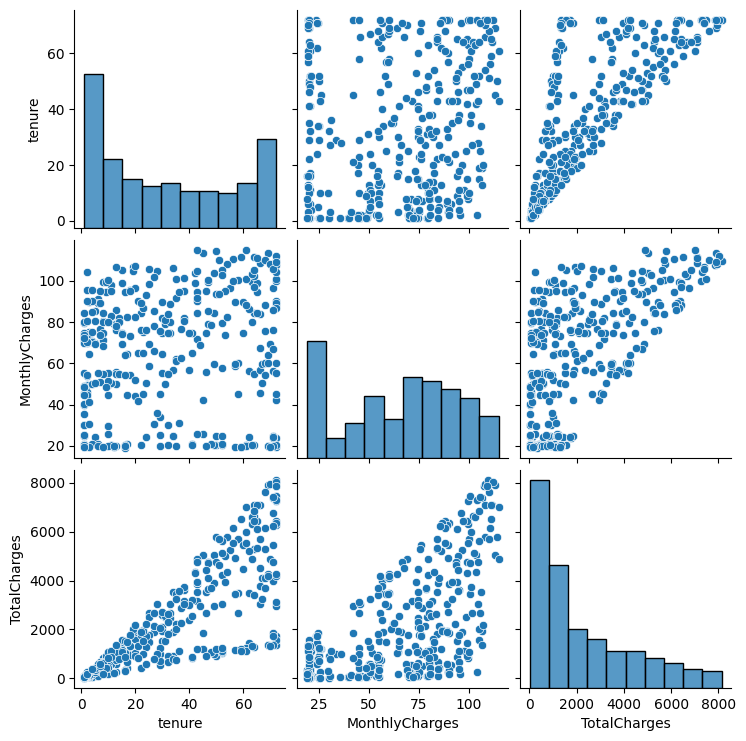

In [48]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show();

## Bivariate analysis

gender  Female  Male
Churn               
No         141   124
Yes         48    46


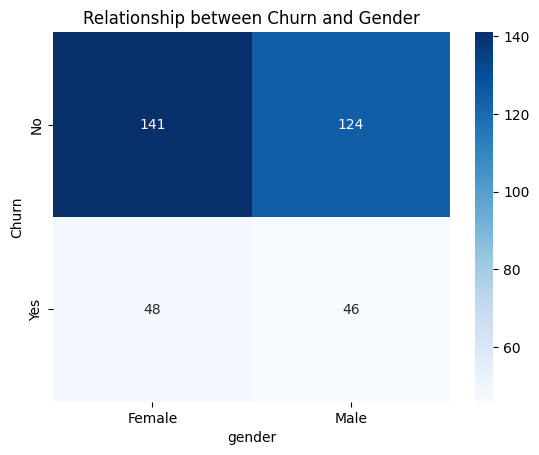

In [49]:
cross_tab = pd.crosstab(df['Churn'], df['gender'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and Gender')
plt.show()

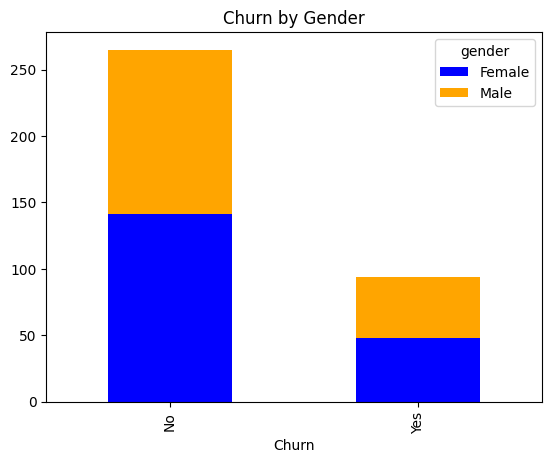

In [50]:
cross_tab.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Churn by Gender')
plt.show()

Contract  Month-to-month  One year  Two year
Churn                                       
No                   112        68        85
Yes                   87         4         3


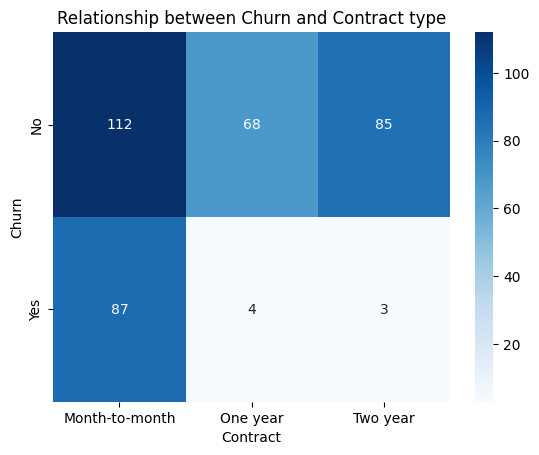

In [136]:
cross_tab = pd.crosstab(df['Churn'], df['Contract'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and Contract type')
plt.show()

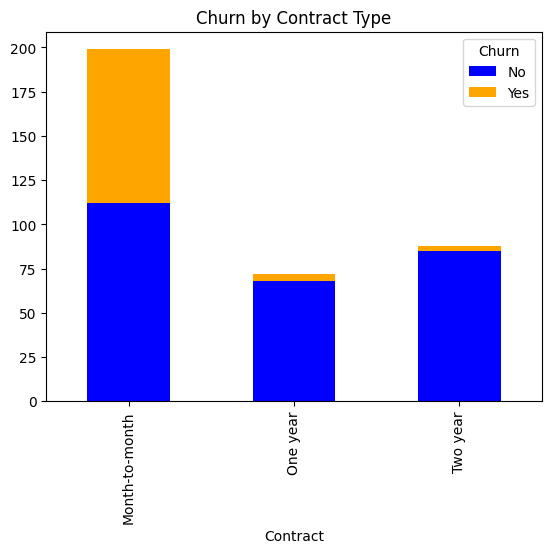

In [51]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Churn by Contract Type')
plt.show();

### Conclusions:
1. Churn is Highest Among Month-to-Month Contracts:
43.7% churn rate for customers with month-to-month contracts shows a much higher likelihood of churn compared to other contract types. This suggests that customers with more flexible month-to-month contracts are more likely to leave the service.


2. One-Year and Two-Year Contracts Have Significantly Lower Churn:
One-year contracts have a 5.6% churn rate, and two-year contracts have an even lower 3.4% churn rate. These much lower rates indicate that longer-term contracts significantly reduce the likelihood of customers leaving.


Customers with longer commitments are likely more invested or locked into their service, making them less likely to churn.

### Actionable insights:
1. **Month-to-Month Customers Are a Risk:** With almost half of month-to-month customers churning, it might be worth considering loyalty programs, discounts, or incentives to encourage these customers to switch to longer-term contracts.

2. **Focus on Long-Term Contracts:** Since one-year and two-year contracts have much lower churn rates, promoting these options through discounts or offers can help improve overall retention.

3. **Churn Prediction:** Contract type is a strong predictor of churn. Focusing on improving the customer experience for month-to-month users could help mitigate high churn rates in that group.

SeniorCitizen    0   1
Churn                 
No             229  36
Yes             69  25


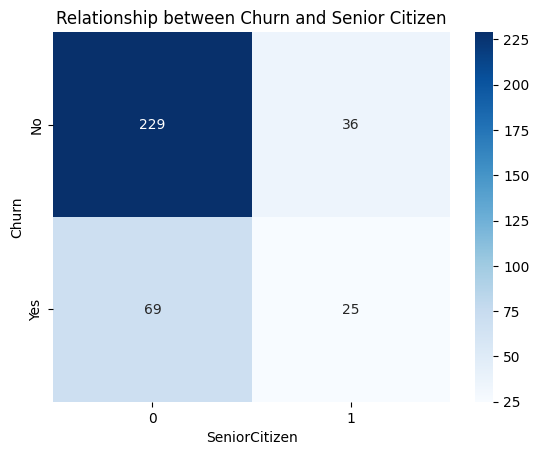

In [137]:
cross_tab = pd.crosstab(df['Churn'], df['SeniorCitizen'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and Senior Citizen')
plt.show()

## Conclusions:
Senior Citizens Have a Higher Churn Rate:
    
    
Senior citizens have a churn rate of 41.0%, which is almost twice as high as the 23.1% churn rate for non-senior citizens.
This suggests that senior citizens are more likely to leave the service compared to non-senior citizens.

## Actionable insights:
1. **Target Senior Citizens:** Since senior citizens have a significantly higher churn rate, the company may need to develop strategies specifically for retaining them. This could involve:

* Offering senior-friendly plans or services (e.g., discounts or simplified service packages).
* Enhancing customer support to address the unique needs of older customers.
2. **Understand Senior Citizen Churn Reasons:** Further analysis is needed to understand why senior citizens are churning at a higher rate. Possible reasons could include pricing, service complexity, or alternative options better suited to their needs.

Partner   No  Yes
Churn            
No       131  134
Yes       59   35


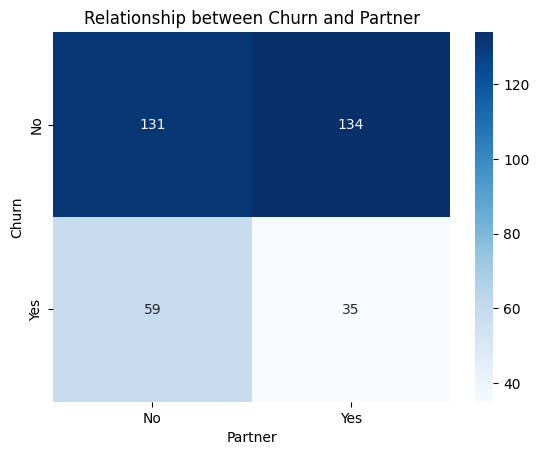

In [138]:
cross_tab = pd.crosstab(df['Churn'], df['Partner'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and Partner')
plt.show();

## Conclusions:
1. Customers Without a Partner Have a Higher Churn Rate:
The churn rate for customers without a partner is 31.0%, compared to 20.7% for those with a partner. This suggests that customers without a partner are more likely to leave the service.
2. Customers With a Partner Have Better Retention:
The majority of customers with a partner (134 out of 169) stay with the service, indicating that having a partner may correlate with stronger retention. Their churn rate is relatively low at 20.7%, meaning they are more likely to remain loyal customers.
## Actionable Insights:
1. **Focus on Retaining Single Customers:**
Since customers without a partner are more likely to churn, the company may want to target this group with special offers, loyalty programs, or personalized engagement strategies to increase retention.
2. **Analyze Reasons for Higher Churn Among Singles:**
Further investigation is needed to understand why customers without a partner are more likely to leave. This could involve customer surveys or feedback to identify specific pain points.
3. **Leverage Partner Retention:**
Customers with a partner are already less likely to churn, but the company can continue promoting family or couple-friendly plans to strengthen their retention even further.

Dependents   No  Yes
Churn               
No          167   98
Yes          81   13


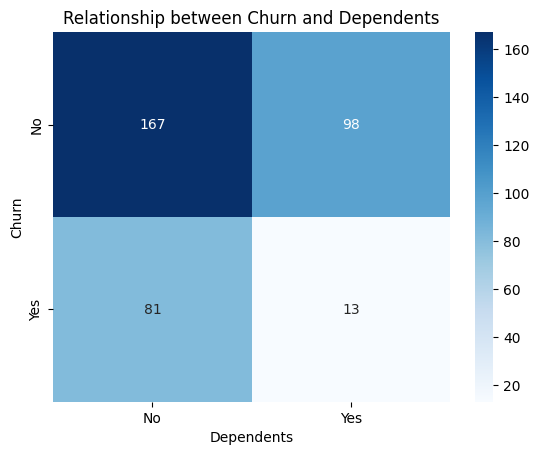

In [139]:
cross_tab = pd.crosstab(df['Churn'], df['Dependents'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and Dependents')
plt.show();

## Conclusions:
1. Customers Without Dependents Have a Higher Churn Rate:
The churn rate for customers without dependents is 32.7%, compared to just 11.7% for customers with dependents. This indicates that customers without dependents are nearly three times more likely to churn than those with dependents.
2. Customers With Dependents Show Strong Retention:
Customers with dependents exhibit a very low churn rate of 11.7%, suggesting that they tend to be more stable and loyal customers. The majority of customers with dependents (98 out of 111, or approximately 88.3%) remain with the service.
## Actionable Insights:
1. **Focus on Single or Independent Customers:**

Customers without dependents have a much higher churn rate, so efforts should be concentrated on this group to reduce churn. Strategies could include offering incentives, discounts, or services tailored to individuals or independent customers.


2. **Leverage Family-Oriented Marketing for Customers With Dependents:**

Since customers with dependents are less likely to churn, promoting family or dependents-related services (e.g., family plans, add-on services) could further solidify loyalty and attract more customers with dependents.

PhoneService  No  Yes
Churn                
No            29  236
Yes           12   82


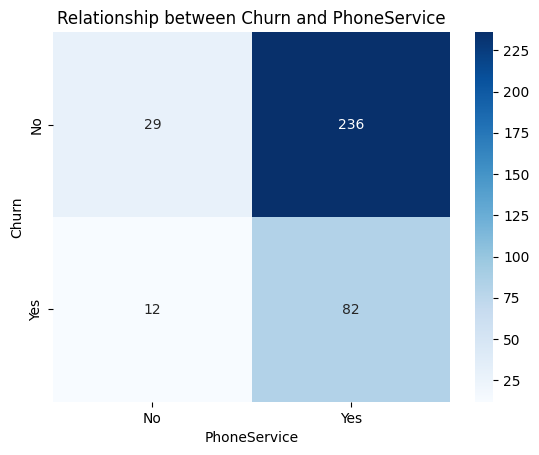

In [135]:
cross_tab = pd.crosstab(df['Churn'], df['PhoneService'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and PhoneService')
plt.show()

## Conclusions:
Phone Service and Churn Behavior:
* Customers without Phone Service:
Only 12 out of 41 customers (about 29% churn rate) without phone service churned. This suggests that the lack of phone service is not strongly correlated with churn.


* Customers with Phone Service:
Out of 318 customers with phone service, 82 churned. This gives a churn rate of about 25.8% for customers with phone service.


**This analysis suggests that the availability of phone service does not strongly drive customer churn.**

MultipleLines   No  No phone service  Yes
Churn                                    
No             134                29  102
Yes             46                12   36


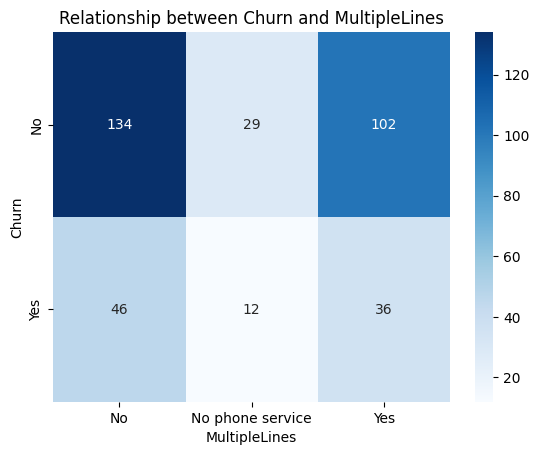

In [140]:
cross_tab = pd.crosstab(df['Churn'], df['MultipleLines'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and MultipleLines')
plt.show()

## Conclusions:
1. Similar Churn Rates Across All Categories:
Customers with multiple lines (26.1%), without multiple lines (25.6%), and with no phone service (29.3%) all have similar churn rates, with no drastic differences between the groups.
2. Slightly Higher Churn Rate Among Customers Without Phone Service:
Customers with no phone service show a slightly higher churn rate (29.3%) compared to those with or without multiple lines. This suggests that customers who don't use phone services at all may be slightly more likely to leave.
## Actionable Insights:
1. **Target Customers Without Phone Service:**

Since customers without phone service have a slightly higher churn rate, the company might explore whether offering them value in other services (e.g., internet or TV) could help retain them.

InternetService  DSL  Fiber optic  No
Churn                                
No               106           96  63
Yes               28           63   3


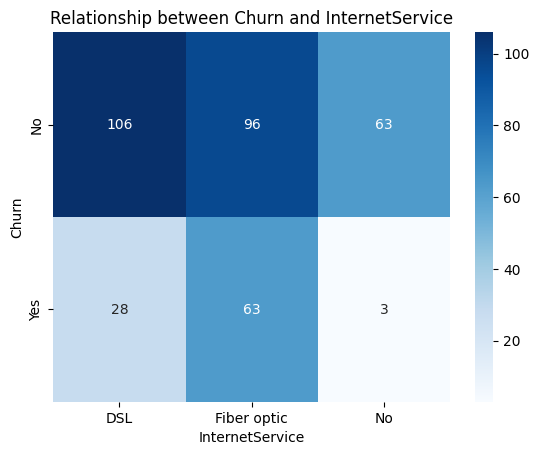

In [141]:
cross_tab = pd.crosstab(df['Churn'], df['InternetService'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and InternetService')
plt.show()

## Conclusions:
1. Higher Churn Rate Among Fiber Optic Customers:
Customers with Fiber optic internet have a much higher churn rate (39.6%) compared to those using DSL (20.9%) or no internet service (4.5%). This indicates that fiber optic customers are more likely to leave the service.
2. Low Churn Among Customers Without Internet Service:
Customers with no internet service have a very low churn rate of just 4.5%, suggesting that customers who don't use internet services are generally loyal.
## Actionable Insights:
1. **Investigate Churn Reasons for Fiber Optic Customers:**

The churn rate for fiber optic customers is significantly higher than for DSL or customers with no internet. This could be due to issues like service dissatisfaction, pricing, or competition. The company may need to investigate and address the specific reasons for fiber optic customers churning.


2. **Promote DSL as a Stable Option:**

Since DSL customers have a lower churn rate compared to fiber optic customers, the company could emphasize DSL's reliability and value in its marketing efforts to retain more customers.


3. **Maintain Satisfaction Among No Internet Service Customers:**

Although customers with no internet service show a low churn rate, ensuring that their other service needs (e.g., phone, TV) are well-met will help maintain their loyalty.

OnlineSecurity   No  No internet service  Yes
Churn                                        
No              106                   63   96
Yes              74                    3   17


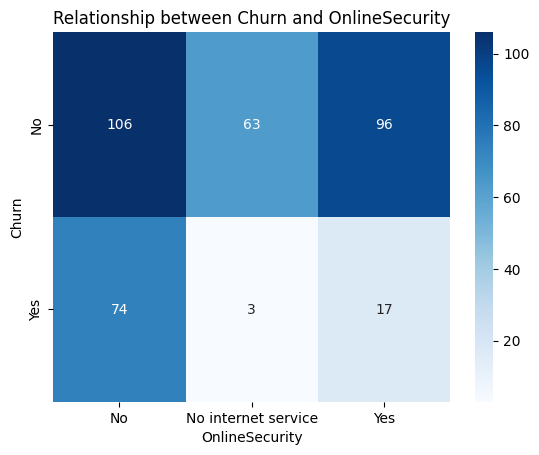

In [142]:
cross_tab = pd.crosstab(df['Churn'], df['OnlineSecurity'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and OnlineSecurity')
plt.show()

## Conclusions:
1. Higher Churn Rate Among Customers Without OnlineSecurity:
Customers who do not have online security services have a churn rate of 41.1%, which is significantly higher compared to those with online security services (15.0%).
2. Low Churn Among Customers Without Internet Service:
Customers with no internet service again show a very low churn rate of 4.5%, suggesting that they are generally less likely to leave.
3. Online Security Services Help Reduce Churn:
The churn rate for customers with online security services is much lower (15.0%) compared to customers without this service. This suggests that customers with online security services are more likely to stay.
## Actionable Insights:
1. **Promote Online Security Services:**

Since having online security significantly reduces churn, the company should promote online security features more heavily to retain customers. Offering free trials or discounts for online security services could encourage more customers to sign up.


2. **Focus on Customers Without Online Security:**

The company should focus on understanding why customers without online security are more likely to churn. They could benefit from targeted retention strategies, such as special offers or bundled services that include online security.
rvices they are receiving (e.g., phone or TV) to maintain their loyalty.


3. **Customer Education:**

The company can educate customers about the importance of online security in today’s digital environment. Highlighting the potential risks of not having this service might persuade more customers to subscribe, thereby reducing churn.

OnlineBackup  No  No internet service  Yes
Churn                                     
No            92                   63  110
Yes           62                    3   29


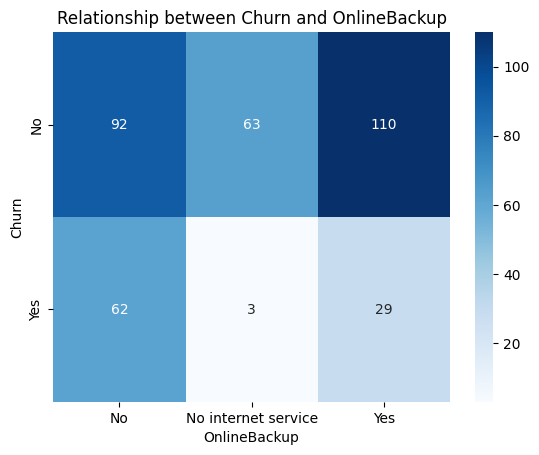

In [143]:
cross_tab = pd.crosstab(df['Churn'], df['OnlineBackup'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and OnlineBackup')
plt.show()

## Conclusions:
1. Higher Churn Rate Among Customers Without OnlineBackup:
Customers who do not have online backup services have a churn rate of 40.3%, which is higher than those with online backup services (20.9%).
2. Low Churn Among Customers Without Internet Service:
As observed in previous cases, customers with no internet service have a low churn rate of 4.5%, suggesting they are relatively loyal.
3. Online Backup Services Reduce Churn:
Customers with online backup services have a significantly lower churn rate (20.9%) compared to those without it. This indicates that having online backup services is associated with better customer retention.
## Actionable Insights:
1. **Encourage Customers to Subscribe to Online Backup Services:**

Since customers with online backup services have a lower churn rate, the company could promote this service more aggressively. Offering bundled services or discounts on online backup could encourage more customers to sign up and reduce overall churn.


2. **Focus on Retaining Customers Without Online Backup:**

Customers without online backup are at a higher risk of churning. The company could target these customers with special offers or highlight the benefits of online backup services to reduce churn.


3. **Maintain Satisfaction Among Customers Without Internet Service:**

Although customers without internet service tend to churn less, the company should continue to provide excellent service in other areas to keep these customers loyal.

DeviceProtection   No  No internet service  Yes
Churn                                          
No                112                   63   90
Yes                63                    3   28


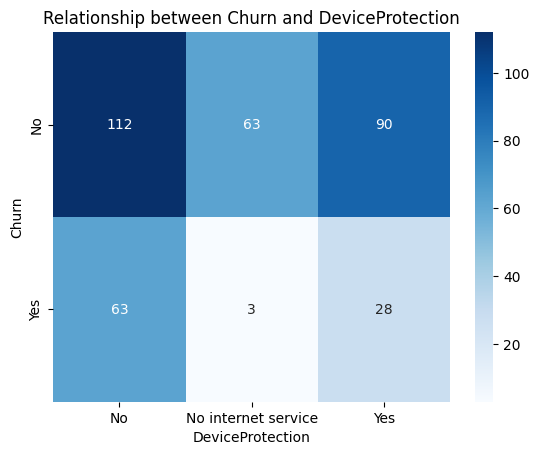

In [144]:
cross_tab = pd.crosstab(df['Churn'], df['DeviceProtection'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and DeviceProtection')
plt.show()

## Conclusions:
1. Higher Churn Rate Among Customers Without DeviceProtection:
Customers who do not have device protection have a churn rate of 36.0%, which is higher compared to customers with device protection (23.7%).
2. Low Churn Among Customers Without Internet Service:
As with previous services, customers who have no internet service exhibit a very low churn rate of 4.5%.
3. Device Protection Helps Reduce Churn:
Customers with device protection have a significantly lower churn rate compared to those without it. This suggests that customers with this service are more likely to stay with the company.
## Actionable Insights:
1. **Promote Device Protection Services:**

Since device protection helps reduce churn, the company should promote this service more aggressively. Offering bundled services or discounts for customers who do not currently have device protection could encourage them to sign up, thus reducing churn.


2. **Target Customers Without Device Protection:**

Customers without device protection are more likely to churn. Targeted retention campaigns, such as special offers for device protection or highlighting the benefits of the service, could help retain these customers.


3. **Continue Satisfaction for Customers Without Internet Service:**

As with previous analyses, customers without internet service have a low churn rate, but their satisfaction should be maintained through strong customer service or additional non-internet services.

TechSupport   No  No internet service  Yes
Churn                                     
No           110                   63   92
Yes           79                    3   12


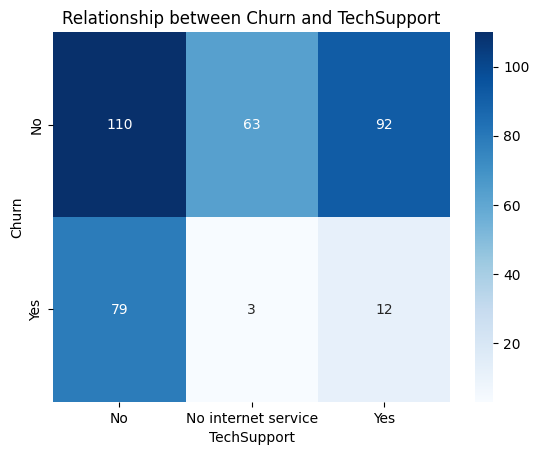

In [145]:
cross_tab = pd.crosstab(df['Churn'], df['TechSupport'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and TechSupport')
plt.show()

## Conclusions:
1. Higher Churn Rate Among Customers Without Tech Support:
Customers who do not have tech support have a churn rate of 41.7%, significantly higher than those with tech support (11.5%).
2. Low Churn Among Customers Without Internet Service:
Similar to previous findings, customers with no internet service maintain a low churn rate of 4.5%.
3. Access to Tech Support Reduces Churn:
Customers with access to tech support exhibit a much lower churn rate compared to those without it, indicating that tech support is a valuable service for customer retention.
## Actionable Insights:
1. **Enhance Awareness of Tech Support Services:**

Since customers with tech support have a significantly lower churn rate, the company should promote these services more effectively. Highlighting the benefits of tech support in marketing materials can encourage more customers to opt-in.


2. **Target Retention Campaigns for Customers Lacking Tech Support:**

Customers without tech support are at a higher risk of churning. The company could implement targeted campaigns to offer tech support services, such as discounts or free trials, to these customers to improve retention.


3. **Maintain Satisfaction for Customers Without Internet Service:**

As previously noted, customers without internet service show low churn rates, so maintaining high satisfaction levels in other service areas is essential for continued loyalty.

StreamingTV  No  No internet service  Yes
Churn                                    
No           95                   63  107
Yes          54                    3   37


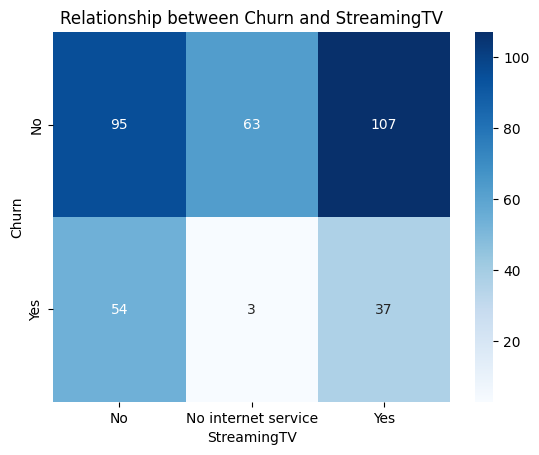

In [146]:
cross_tab = pd.crosstab(df['Churn'], df['StreamingTV'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and StreamingTV')
plt.show();

## Conclusions:
1. Higher Churn Rate Among Customers Without Streaming TV:
Customers who do not have streaming TV services have a churn rate of 36.3%, which is significantly higher than those with streaming TV services (25.7%).
2. Low Churn Among Customers Without Internet Service:
Customers without internet service continue to show a low churn rate of 4.5%, consistent with previous analyses.
3. Streaming TV as a Retention Factor:
Access to streaming TV services appears to correlate with a lower churn rate, indicating that customers who enjoy streaming services are more likely to remain with the company.
## Actionable Insights:
1. **Promote Streaming Services:**

Since customers with streaming TV services have a lower churn rate, the company should enhance marketing efforts around streaming services. This could involve bundled packages or promotional discounts to attract new customers and retain existing ones.


2. **Target Campaigns for Customers Lacking Streaming Services:**

Given the higher churn rate among customers without streaming TV, targeted retention strategies could be beneficial. These might include limited-time offers for streaming services or free trials to encourage sign-ups.


3. **Maintain Satisfaction for Customers Without Internet Service:**

As before, customers without internet service display low churn rates. Ensuring that these customers receive excellent service and support in their other offerings will be key to retaining their loyalty.

StreamingMovies  No  No internet service  Yes
Churn                                        
No               99                   63  103
Yes              50                    3   41


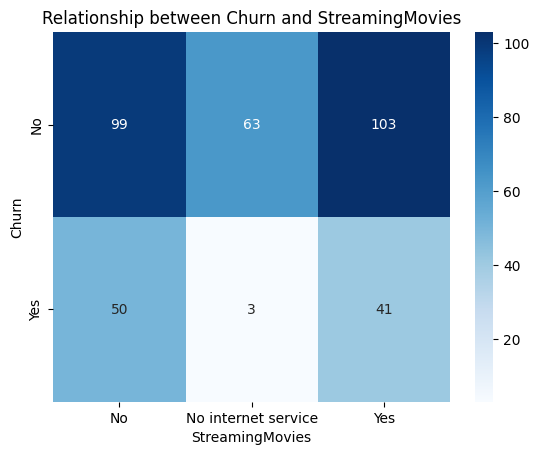

In [147]:
cross_tab = pd.crosstab(df['Churn'], df['StreamingMovies'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and StreamingMovies')
plt.show()

## Conclusions:
1. Higher Churn Rate Among Customers Without Streaming Movies:
Customers who do not have streaming movies services have a churn rate of 33.7%, which is higher than those with streaming movie services (28.4%).
2. Low Churn Among Customers Without Internet Service:
Customers without internet service continue to exhibit a low churn rate of 4.5%, consistent with previous analyses.
3. Streaming Movies as a Retention Factor:
Access to streaming movie services appears to correlate with a lower churn rate, suggesting that customers who enjoy streaming services are more likely to remain with the company.
## Actionable Insights:
1. **Promote Streaming Movie Services:**

Since customers with streaming movie services have a lower churn rate, the company should enhance marketing efforts around streaming movie services. This could involve bundled packages or promotional discounts to attract new customers and retain existing ones.


2. **Target Campaigns for Customers Lacking Streaming Movie Services:**

Given the higher churn rate among customers without streaming movies, targeted retention strategies could be beneficial. These might include limited-time offers for streaming movie services or free trials to encourage sign-ups.


3. **Maintain Satisfaction for Customers Without Internet Service:**

As previously noted, customers without internet service display low churn rates. Ensuring that these customers receive excellent service and support in their other offerings will be key to retaining their loyalty.

PaperlessBilling   No  Yes
Churn                     
No                119  146
Yes                26   68


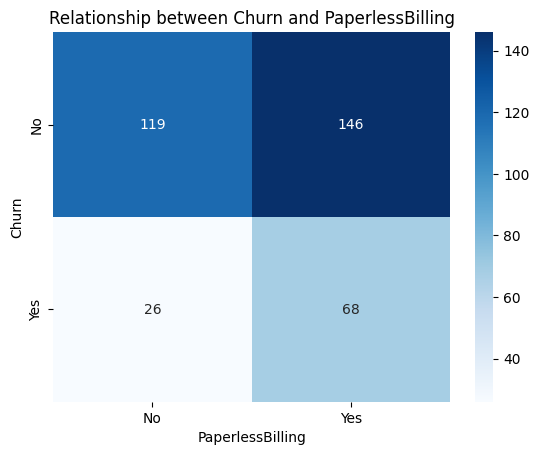

In [148]:
cross_tab = pd.crosstab(df['Churn'], df['PaperlessBilling'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and PaperlessBilling')
plt.show();

## Conclusions:
1. Higher Churn Rate Among Customers With Paperless Billing:


Customers who opt for paperless billing have a churn rate of 31.8%, which is significantly higher than those who do not opt for paperless billing (17.9%).


2. Impact of Paperless Billing on Churn:


The data suggests that opting for paperless billing may be associated with a higher likelihood of churn. This might indicate that customers who prefer paperless billing are less satisfied or have other underlying issues leading to their decision to leave.

PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                    60                       72   
Yes                                   14                        9   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                           71            62  
Yes                          54            17  


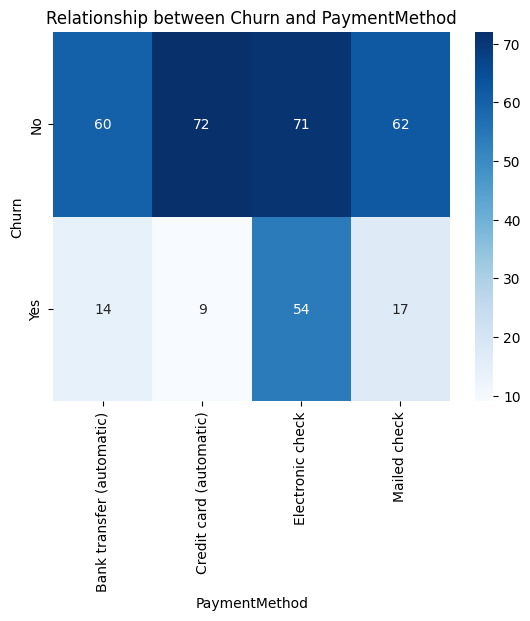

In [149]:
cross_tab = pd.crosstab(df['Churn'], df['PaymentMethod'])
print(cross_tab)

# Visualizing the relationship using a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Churn and PaymentMethod')
plt.show();

## Conclusions:
1. Electronic Check Method has the Highest Churn Rate:
Customers using Electronic Check exhibit a very high churn rate of 43.2%, suggesting that this payment method may be associated with customer dissatisfaction or other issues.
2. Credit Card (Automatic) Method has the Lowest Churn Rate:
Customers using Credit Card (Automatic) have the lowest churn rate of 11.1%, indicating this payment method may be more favorable among customers.
3. Bank Transfer and Mailed Check:
Both Bank Transfer (Automatic) (18.9%) and Mailed Check (21.5%) show moderate churn rates compared to Electronic Checks, but higher than Credit Card.
## Actionable Insights:
1. **Investigate Electronic Check Issues:**

The high churn rate among customers using electronic checks should be investigated. Gathering feedback on why customers prefer this method and their experiences could help identify issues that need to be addressed.


2. **Encourage Credit Card Payments:**

Since credit card payments show a lower churn rate, consider offering incentives for customers to switch to this method, such as discounts or rewards programs.


3. **Monitor Payment Preferences:**

Continuously monitor customer payment preferences and churn rates. Understanding shifts in payment method trends can inform future marketing and retention strategies.

# Numerical Vs Categorical bivariate analysis

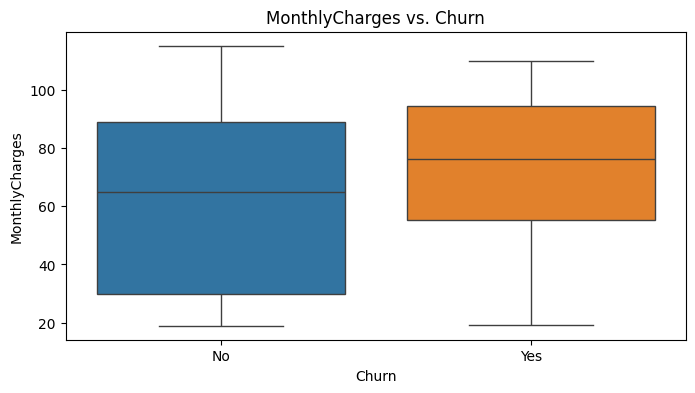

In [57]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', legend=False)
plt.title('MonthlyCharges vs. Churn')
plt.show();

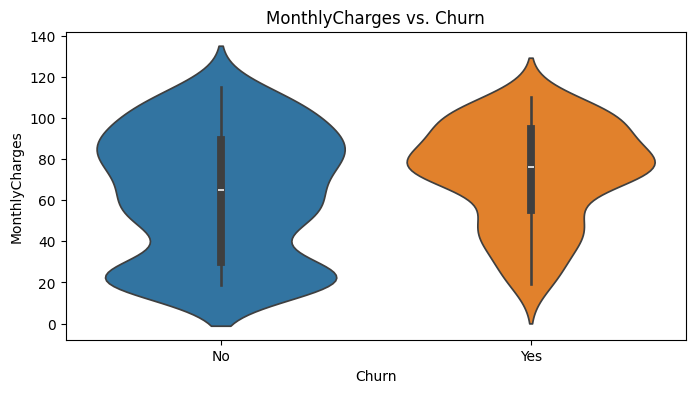

In [58]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', legend=False)
plt.title('MonthlyCharges vs. Churn')
plt.show();

In [150]:
# Summary Statistics
summary_stats = df.groupby('Churn')['MonthlyCharges'].agg(['mean', 'median', 'std'])
print(summary_stats)

            mean  median        std
Churn                              
No     63.076226  64.950  30.501547
Yes    73.185638  76.275  23.887919


## Interpretation
1. **Mean Monthly Charges:**

Customers who Churned (Yes) have a higher average monthly charge (73.19) compared to those who did not churn (63.08).
This indicates that higher monthly charges may be associated with customers who are more likely to churn.


2. **Median Monthly Charges:**

The median monthly charges follow a similar pattern, with churned customers having a median of 76.28 compared to 64.95 for non-churned customers.
The median being higher than the mean for both groups suggests a right skew in the distribution of monthly charges.


3. **Standard Deviation:**

The standard deviation for non-churned customers (30.50) is higher than that for churned customers (23.89).
This indicates that there is greater variability in monthly charges among customers who did not churn compared to those who did. Non-churned customers may have a wider range of charges.
## Conclusions and Insights
* **Churn Risk:** The analysis suggests that customers who pay higher monthly charges may be more likely to churn. This could indicate dissatisfaction with the service relative to the cost, or that higher-paying customers might have higher expectations.

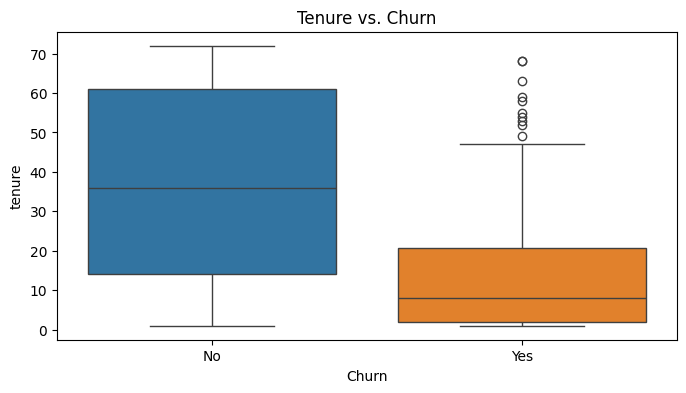

In [59]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='tenure', data=df, hue='Churn', legend=False)
plt.title('Tenure vs. Churn')
plt.show();

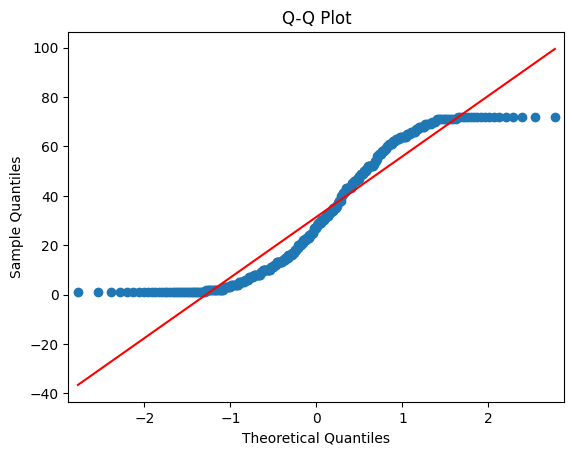

In [152]:
import statsmodels.api as sm
fig = sm.qqplot(df['tenure'], line='s')
plt.title('Q-Q Plot')
plt.show()

In [151]:
# Summary Statistics
summary_stats = df.groupby('Churn')['tenure'].agg(['mean', 'median', 'std'])
print(summary_stats)

            mean  median       std
Churn                             
No     37.188679    36.0  23.99673
Yes    15.265957     8.0  18.19735


## Interpretation
1. **Mean Tenure:**

Customers who Did Not Churn (No) have a significantly higher average tenure (37.19 months) compared to those who Churned (Yes), who have an average tenure of only 15.27 months.


This suggests that longer-tenured customers are less likely to churn, indicating that as customers stay longer, they may become more loyal to the service.


2. **Median Tenure:**

The median tenure for non-churned customers is 36.00 months, while for churned customers, it is significantly lower at 8.00 months.


This further supports the observation that customers who remain with the service tend to have a longer duration of stay.


3. **Standard Deviation:**

The standard deviation for tenure among non-churned customers is 23.99, which indicates considerable variability in how long customers have been with the service.


For churned customers, the standard deviation is lower (18.20), suggesting that the tenure of churned customers is less variable, possibly indicating that most churned customers have a short tenure.


## Conclusions and Insights
* **Churn Risk:** The analysis indicates a **strong negative correlation between tenure and churn**. Customers with shorter tenures are more likely to churn, while those with longer tenures are more likely to stay.

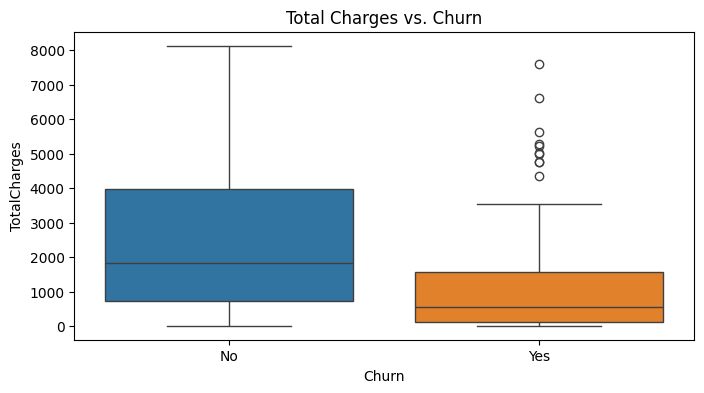

In [61]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn', legend=False)
plt.title('Total Charges vs. Churn')
plt.show();

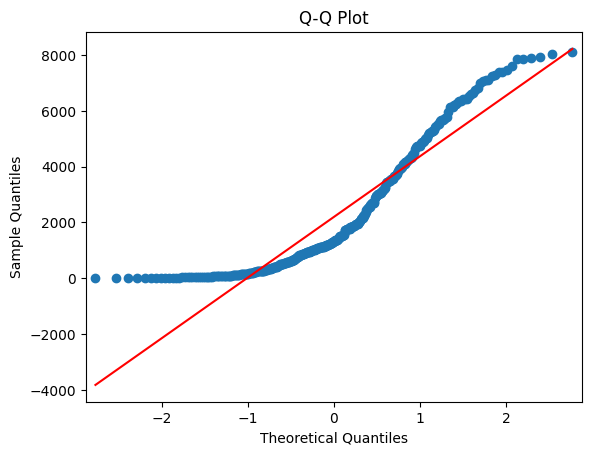

In [154]:
import statsmodels.api as sm
fig = sm.qqplot(df['TotalCharges'], line='s')
plt.title('Q-Q Plot')
plt.show()

In [153]:
# Summary Statistics
summary_stats = df.groupby('Churn')['TotalCharges'].agg(['mean', 'median', 'std'])
print(summary_stats)

              mean    median          std
Churn                                    
No     2530.936038  1821.950  2236.224487
Yes    1264.679255   547.325  1682.155325


## Interpretation
1. **Mean Total Charges:**

Customers who Did Not Churn (No) have a significantly higher average total charge of 2530.94 compared to those who Churned (Yes), whose average total charge is 1264.68.


This suggests that customers who stay longer tend to accumulate higher total charges, potentially due to extended use of services or upgrades.


2. **Median Total Charges:**

The median total charges for non-churned customers is 1821.95, whereas for churned customers, it is much lower at 547.33.


The disparity in median values indicates that most churned customers have made significantly lower total payments compared to those who remain.


3. **Standard Deviation:**

The standard deviation for non-churned customers (2236.22) is much higher than that for churned customers (1682.16), indicating that there is a greater variability in total charges among customers who do not churn.


This variability may imply that some long-term customers are significantly higher spenders, while churned customers tend to have more similar, lower total charges.


## Conclusions and Insights
* **Churn Risk:** The analysis indicates a **strong negative correlation between total charges and churn**. Customers with lower total charges are more likely to churn, while those with higher total charges are more likely to remain.

# Automated EDA 

In [157]:
from ydata_profiling import ProfileReport

In [158]:
report = ProfileReport(df)

In [159]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [160]:
report.to_file(output_file='Custom Pandas Profiling Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Summary :-
## 1. How does customer tenure relate to churn?
**Observation:**

Customers with longer tenures are significantly less likely to churn. The mean tenure for customers who Did Not Churn is 37.19 months, while for those who Churned, it is only 15.27 months.


The median tenure follows a similar trend: non-churned customers have a median tenure of 36 months compared to just 8 months for churned customers.


**Conclusion: Longer tenure correlates negatively with churn**

## 2. Is there a correlation between monthly charges and churn?
Based on the data provided and it's analysis, **monthly charges are negatively correlated with churn**

## 3. Which service types (Internet, Phone, Streaming) have higher churn rates?
* Internet Service:

        DSL: Higher retention with 106 churned vs. 28 churned.
        Fiber Optic: Moderate churn rates with 96 not churned vs. 63 churned.
        No Internet Service: Lowest churn with 63 not churned vs. 3 churned.
* Phone Service:

        Customers with Phone Service have lower churn rates (82 churned vs. 236 not churned).
        Customers without Phone Service have slightly higher churn (12 churned vs. 29 not churned).
* Streaming Services:

        The Streaming TV and Streaming Movies services both show higher churn rates compared to customers who do not 
        subscribe to these services.